<a href="https://colab.research.google.com/github/DeveloperSeJin/Study_machine_learning/blob/main/RandomForest(wineClassify).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [9]:
file = './drive/MyDrive/wine.csv'
data = pd.read_csv(file, names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
    'quality', 'class'])

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [12]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class                   0
dtype: int64

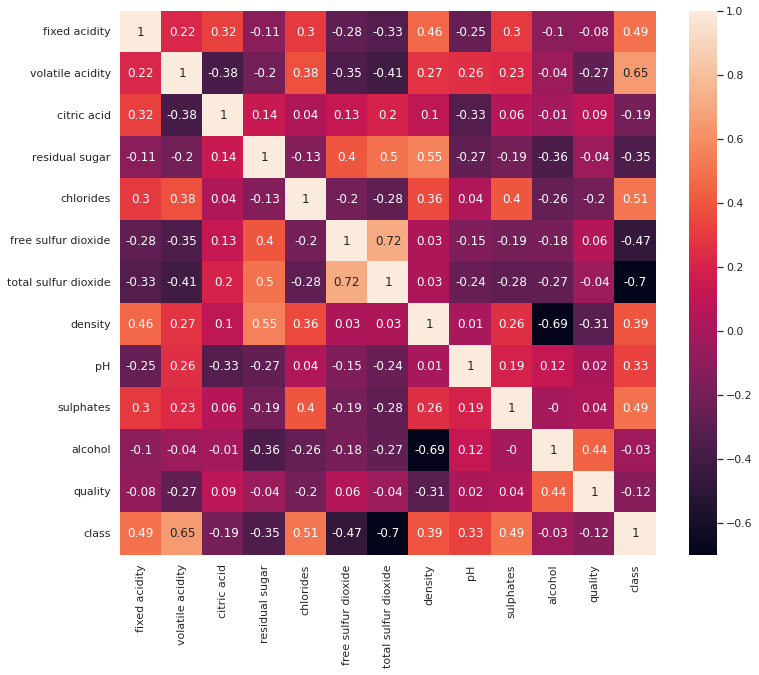

In [14]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = data.corr().round(2)
sns.heatmap(data = correlation_matrix, annot=True)
plt.show()

In [15]:
X = data[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates']]
y = data['class']
print(X)
print(y)

      fixed acidity  volatile acidity  residual sugar  chlorides  \
0               7.4              0.70             1.9      0.076   
1               7.8              0.88             2.6      0.098   
2               7.8              0.76             2.3      0.092   
3              11.2              0.28             1.9      0.075   
4               7.4              0.70             1.9      0.076   
...             ...               ...             ...        ...   
6492            6.2              0.21             1.6      0.039   
6493            6.6              0.32             8.0      0.047   
6494            6.5              0.24             1.2      0.041   
6495            5.5              0.29             1.1      0.022   
6496            6.0              0.21             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density  sulphates  
0                    11.0                  34.0  0.99780       0.56  
1                    25.0                  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True,random_state = 123456)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

In [20]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.994
Mean accuracy score: 0.995


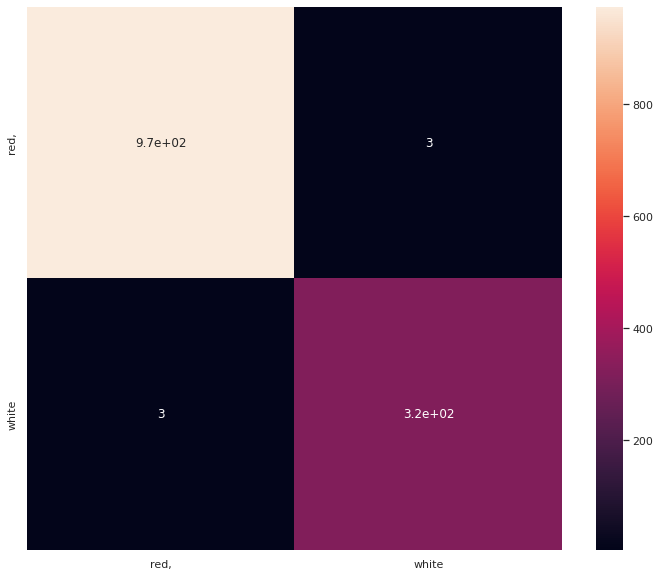

In [22]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=['red,', 'white'], index=['red,', 'white'])
sns.heatmap(cm, annot=True)